In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import scipy.stats as scs
import spei as si  # si for standardized index

In [2]:
pet = pd.read_csv("../data/climate-data/pet.csv")

In [3]:
precipitation = pd.read_csv("../data/climate-data/precipitation.csv")

In [4]:
spain_map = gpd.read_file("../data/maps/spain-map.geojson")

In [5]:
pet.head()

,date,province_name,average_PET
0,2000-01-01,Almería,3589.333560
1,2000-01-01,Cádiz,4127.081502
2,2000-01-01,Córdoba,3440.179182
3,2000-01-01,Granada,3157.447551
4,2000-01-01,Huelva,3529.412466


In [6]:
precipitation.head()

,date,province_name,average_precipitation
0,2000-01-01,Almería,28.178856
1,2000-01-01,Cádiz,49.877930
2,2000-01-01,Córdoba,24.652694
3,2000-01-01,Granada,33.576140
4,2000-01-01,Huelva,29.123514


In [7]:
spain_map.head()

,id,ADM0_CODE,ADM0_NAME,ADM1_CODE,ADM1_NAME,ADM2_CODE,ADM2_NAME,DISP_AREA,EXP2_YEAR,STATUS,STR2_YEAR,Shape_Area,Shape_Leng,geometry
0,0000000000000000261b,229,Spain,2716,Andalucía,25776,Almería,NO,3000,Member State,1000,0.886192,5.757459,"MULTIPOLYGON (((-3.04429 35.94359, -3.04257 35..."
1,0000000000000000261c,229,Spain,2716,Andalucía,25777,Cádiz,NO,3000,Member State,1000,0.740346,6.353672,"MULTIPOLYGON (((-5.61149 36.00485, -5.60918 36..."
2,0000000000000000261d,229,Spain,2716,Andalucía,25778,Córdoba,NO,3000,Member State,1000,1.412444,8.316528,"MULTIPOLYGON (((-5.08497 37.64379, -5.08421 37..."
3,0000000000000000261e,229,Spain,2716,Andalucía,25779,Granada,NO,3000,Member State,1000,1.281927,7.149425,"POLYGON ((-3.14019 36.78779, -3.13982 36.78802..."
4,0000000000000000261f,229,Spain,2716,Andalucía,25780,Huelva,NO,3000,Member State,1000,1.019158,7.582351,"MULTIPOLYGON (((-6.90102 37.15554, -6.90098 37..."


In [8]:
print(pet.shape)

(14976, 3)


In [9]:
print(precipitation.shape)

(14976, 3)


In [10]:
precipitation.iloc[precipitation["average_precipitation"].argmax()]

date                     2018-03-01
province_name            Pontevedra
average_precipitation    544.225424
Name: 11380, dtype: object

In [11]:
pet.iloc[pet["average_PET"].argmax()]

date               2022-07-01
province_name         Badajoz
average_PET      24595.305489
Name: 14079, dtype: object

In [12]:
print(f"Number of unique provinces in pet: {pet['province_name'].nunique()}")
print(
    f"Number of unique provinces in precipitation: {precipitation['province_name'].nunique()}"
)
print(f"Number of unique provinces in spain_map: {spain_map['ADM2_NAME'].nunique()}")

Number of unique provinces in pet: 52
Number of unique provinces in precipitation: 52
Number of unique provinces in spain_map: 52


In [13]:
precipitation_2023 = precipitation.query("date == '2023-12-01'")
pet_2023 = pet.query("date == '2023-12-01'")

In [14]:
precipitation_map = spain_map.merge(
    precipitation_2023, left_on="ADM2_NAME", right_on="province_name"
).loc[:, ["province_name", "average_precipitation", "geometry"]]

In [15]:
pet_map = spain_map.merge(pet_2023, left_on="ADM2_NAME", right_on="province_name").loc[
    :, ["province_name", "average_PET", "geometry"]
]

In [16]:
precipitation_map.head()

,province_name,average_precipitation,geometry
0,Almería,13.790718,"MULTIPOLYGON (((-3.04429 35.94359, -3.04257 35..."
1,Cádiz,39.751453,"MULTIPOLYGON (((-5.61149 36.00485, -5.60918 36..."
2,Córdoba,37.338619,"MULTIPOLYGON (((-5.08497 37.64379, -5.08421 37..."
3,Granada,28.721261,"POLYGON ((-3.14019 36.78779, -3.13982 36.78802..."
4,Huelva,32.845376,"MULTIPOLYGON (((-6.90102 37.15554, -6.90098 37..."


In [17]:
pet_map.head()

,province_name,average_PET,geometry
0,Almería,4745.522444,"MULTIPOLYGON (((-3.04429 35.94359, -3.04257 35..."
1,Cádiz,4004.288548,"MULTIPOLYGON (((-5.61149 36.00485, -5.60918 36..."
2,Córdoba,3413.277023,"MULTIPOLYGON (((-5.08497 37.64379, -5.08421 37..."
3,Granada,4259.772660,"POLYGON ((-3.14019 36.78779, -3.13982 36.78802..."
4,Huelva,3317.623997,"MULTIPOLYGON (((-6.90102 37.15554, -6.90098 37..."


In [21]:
pet_2023.shape

(52, 3)

In [22]:
precipitation_2023.shape

(52, 3)

In [46]:
pet.shape

(14976, 3)

In [47]:
precipitation.shape

(14976, 3)

In [49]:
all_data = pd.merge(left=pet, right=precipitation, on=["province_name", "date"])

In [50]:
all_data["water_balance"] = all_data["average_precipitation"] - all_data["average_PET"]

<Axes: >

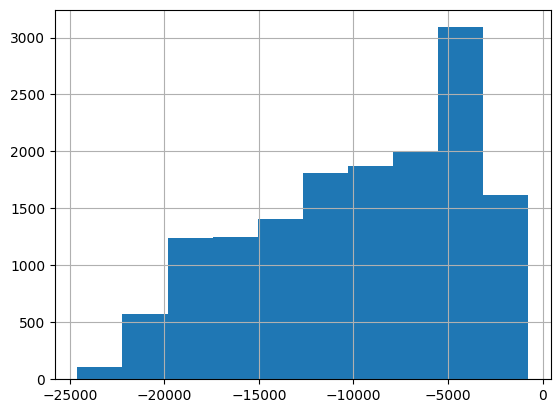

In [51]:
all_data["water_balance"].hist()

In [60]:
for province_name, province_data in all_data.groupby(by="province_name"):
    province_data = province_data.sort_values(by='date')

    res = si.spei(province_data.set_index('date')['water_balance'], 1)
    
    break

AttributeError: 'int' object has no attribute 'fit'

In [61]:
from spei import spei

In [62]:
spei?

Signature:
spei(
    series: pandas.core.series.Series,
    dist: Union[Any, scipy.stats._distn_infrastructure.rv_continuous] = <scipy.stats._continuous_distns.fisk_gen object at 0x000001EC59303980>,
    timescale: int = 0,
    fit_freq: Optional[str] = None,
    fit_window: int = 0,
    prob_zero: bool = False,
) -> pandas.core.series.Series
Docstring:
Method to compute the Standardized Precipitation Evaporation Index
[spei_2010]_.

Parameters
----------
series: pandas.Series
    Pandas time series of the precipitation. Time series index
    should be a pandas DatetimeIndex.
dist: scipy.stats.rv_continuous
    Can be any continuous distribution from the scipy.stats library.
    However, for the SPEI generally the log-logistic (fisk) probability
    density function is recommended. Other appropriate choices could be
    the lognormal or PearsonIII distribution.
timescale : int, optional, default=0
    Size of the moving window over which the series is summed. If zero, no
    summation 